<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/SESSION/1128_TensorFlow_%EC%9D%98%EB%A5%98%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **|TensorFlow** : 의류이미지 분류

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 1. 패션 MNIST 데이터셋 임포트하기

* 10개의 범주와 70,000개의 흑백 이미지로 구성된 패션 MNIST DATA

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


* 클래스

|레이블|클래스|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

---
## 2. 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

---
## 3. 데이터 전처리

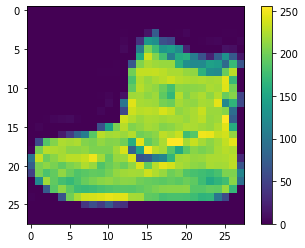

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#값의 범위를 0~1로 조정

train_images = train_images / 255.0
test_images = test_images / 255.0

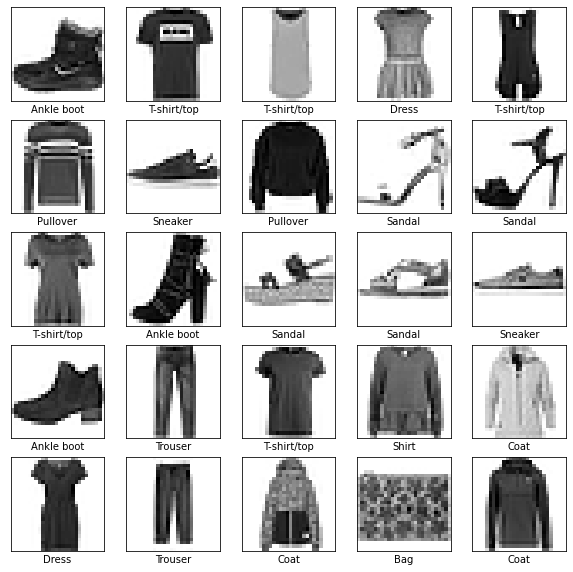

In [12]:
plt.figure(figsize = (10,10))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

---
## 4. 모델 구성

### 1) 층 설정

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

### 2) 모델 컴파일

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

---
## 5. 모델 훈련

### 1) 모델 피드

In [15]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4991 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3717 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3368 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3122 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2792 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2464 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

### 2) 정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\n Test accuracy : ', test_acc)

313/313 - 1s - loss: 0.3586 - accuracy: 0.8724 - 605ms/epoch - 2ms/step

 Test accuracy :  0.8723999857902527


### 3) 예측하기

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([5.8993859e-08, 5.2563037e-13, 2.6313112e-09, 1.4788506e-08,
       1.6011725e-09, 2.4433769e-03, 5.5086866e-07, 1.4005104e-02,
       8.4482923e-07, 9.8355001e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
#10개 클래스에 대한 예측 그래프로 표현

def plot_image(i, predictions_array, true_label, img) :
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

In [24]:
def plot_value_array(i, predictions_array,true_label) :
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 4) 예측 확인

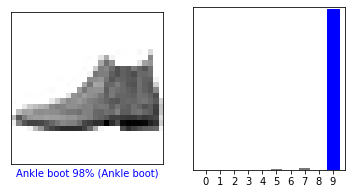

In [25]:
#0번쨰 원소의 이미지, 예측 신뢰도 점수 배열 확인

i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

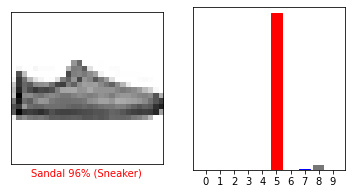

In [26]:
#12번째 원소의 이밎, 예측, 신뢰도 점수 배열 확인

i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

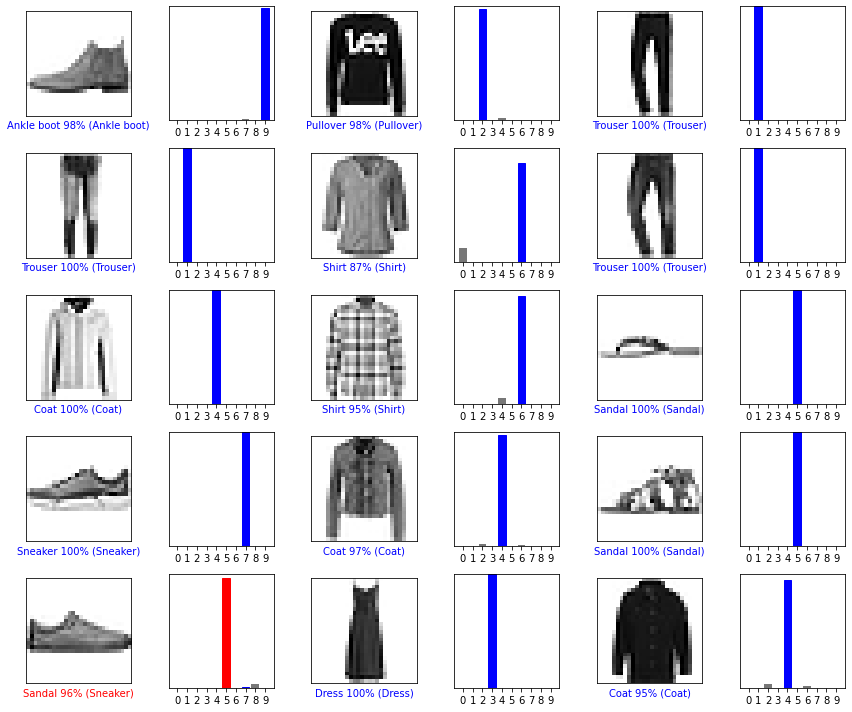

In [27]:
num_rows = 5
num_cols = 3

num_images = num_rows* num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images) :
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

---
## 6. 훈련된 모델 사용하기

In [28]:
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 46ms/step
[[1.3371609e-04 3.6572783e-11 9.7793353e-01 9.2877483e-10 1.9168658e-02
  5.2538713e-14 2.7640497e-03 1.9553136e-21 5.3894211e-10 2.9045846e-15]]


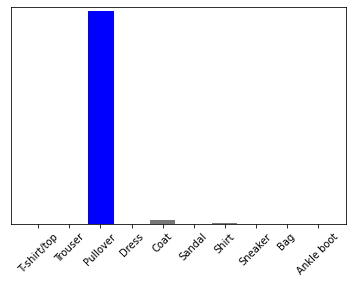

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_= plt.xticks(range(10),class_names, rotation = 45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2